# Initial Data Exploration for Graph and Patents

This section looks at exploration of graph and patent data to work to link the data together.

Mainly using the `2.Initial_Graph_Building/4.WRDS_data_mapping.ipynb`

There's a lot of work needed to be done on data modelling, so get that done first before working on what Nick suggested yesterday!!

In [6]:
import pandas as pd
import numpy as np
from itertools import combinations
import networkx as nx
pd.set_option('display.max_columns', None)

In [7]:
file_path = "../2.Initial_Graph_Building/boardex_us_companies_full_data_2022_2024.csv"

boardex_data = pd.read_csv(file_path, index_col = 0)

# Display the first few rows of the data to understand its structure
boardex_data.head()

,associationtype,boardname,companyname,directorname,overlapyearstart,overlapyearend,role,associatedrole,conncompanyorgtype,boardid,companyid,directorid,roletitle,roleboardposition,roleedflag,overlapyearstart_int,overlapyearend_int,startcompanydatestartrole,startcompanydateendrole,conncompanydatestartrole,conncompanydateendrole,orgtype
0,Unlisted Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,Gladius Pharmaceuticals Inc,Doctor Steve Gilman,2020,Curr,Independent Director (Brd) (SD),Scientific Advisor (Non-Brd),Private,401.0,2734400.0,601453.0,Independent Director,Brd,SD,2020,NaN,2015-01-06,NaN,NaN,NaN,Quoted
1,Unlisted Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,ContraFect Corp,Doctor Steve Gilman,2023,Curr,Independent Director (Brd) (SD),Independent Vice Chairman (Brd) (SD),Private,401.0,3700766.0,601453.0,Independent Director,Brd,SD,2023,NaN,2015-01-06,NaN,2023-11-09,NaN,Quoted
2,Other,VERICEL CORP (Aastrom Biosciences Inc prior to...,Northeastern University,Doctor Steve Gilman,2016,Curr,Independent Director (Brd) (SD),Advisory Board Member,Universities,401.0,61472.0,601453.0,Independent Director,Brd,SD,2016,NaN,2015-01-06,NaN,NaN,NaN,Quoted
3,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,AKEBIA THERAPEUTICS INC,Doctor Steve Gilman,2018,Curr,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,401.0,2055831.0,601453.0,Independent Director,Brd,SD,2018,NaN,2015-01-06,NaN,2018-12-12,NaN,Quoted
4,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,SCYNEXIS INC,Doctor Steve Gilman,2015,Curr,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,401.0,2065362.0,601453.0,Independent Director,Brd,SD,2015,NaN,2015-01-06,NaN,2015-02-25,NaN,Quoted


In [12]:
# get the keys data

boardex_keys_data = pd.read_csv("../2.Initial_Graph_Building/USE_THIS_GVKEY_boardex_us_companies_keys.csv", index_col= 0 )
boardex_keys_data.head()

,permco,gvkey,companyid,score,preferred,duplicate
0,35,1259,1362.0,3.0,1.0,0.0
1,216,1602,2068.0,1.0,1.0,0.0
2,250,7799,21659.0,1.0,1.0,1.0
3,250,7799,1651568.0,1.0,1.0,1.0
4,682,18738,28834.0,1.0,1.0,0.0


In [14]:
boardex_keys_data["duplicate"].value_counts()

duplicate
0.0    1138
1.0     133
Name: count, dtype: int64

In [15]:
boardex_keys_data["preferred"].value_counts() # if duplicates - later get information by gvkey instead at the end to solve the duplicate issue from before

preferred
1.0    1221
0.0      50
Name: count, dtype: int64

Solving duplicate issue

if duplicates - later get information by gvkey instead at the end to solve the duplicate issue from before

As seen in the regression

**The information on the metadata does actually mean something!!**

Check again the data dictionary for what they mean

In [16]:
def concatenate_to_literal(strings: str):
    """
    Useful function to convert to a string literal
    """

    # Convert each string in the list to be surrounded by single quotes
    quoted_strings = [f"'{s}'" for s in strings]
    # Join the quoted strings with a comma and space
    joined_strings = ', '.join(quoted_strings)
    # Format the joined strings within parentheses
    result = f"({joined_strings})"
    return result

##### Patent data exploration

Just search the patent data 

In [17]:
import wrds

conn = wrds.Connection()

WRDS recommends setting up a .pgpass file.
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [18]:
conn.list_libraries().sort()
conn.list_libraries()

['aha_sample',
 'ahasamp',
 'audit',
 'audit_acct_os',
 'audit_audit_comp',
 'audit_common',
 'audit_corp_legal',
 'audit_europe',
 'auditsmp',
 'auditsmp_all',
 'bank',
 'bank_all',
 'block',
 'block_all',
 'boardex',
 'boardex_eur',
 'boardex_na',
 'boardex_row',
 'boardex_trial',
 'boardex_uk',
 'boardsmp',
 'bvd_amadeus_trial',
 'bvd_bvdbankf_trial',
 'bvd_orbis_trial',
 'bvdsamp',
 'calcbench_trial',
 'calcbnch',
 'cboe',
 'cboe_all',
 'cboe_sample',
 'cboesamp',
 'ciq',
 'ciq_common',
 'ciq_pplintel',
 'ciqsamp',
 'ciqsamp_capstrct',
 'ciqsamp_common',
 'ciqsamp_keydev',
 'ciqsamp_pplintel',
 'ciqsamp_ratings',
 'ciqsamp_transactions',
 'ciqsamp_transcripts',
 'cisdmsmp',
 'columnar',
 'comp',
 'comp_bank',
 'comp_bank_daily',
 'comp_execucomp',
 'comp_global',
 'comp_global_daily',
 'comp_na_annual_all',
 'comp_na_daily_all',
 'comp_na_monthly_all',
 'comp_segments_hist',
 'comp_segments_hist_daily',
 'comp_snapshot',
 'compa',
 'compb',
 'compg',
 'compm',
 'compsamp',
 'compsa

In [19]:
conn.list_tables(library= 'wrdsapps')

['_eq_2_bm_',
 'bdxcrspcomplink',
 'bdxinslink',
 'boardex_ciq',
 'boardex_ciq_link',
 'boardex_trinsider',
 'boardex_trinsider_link',
 'boardex_twoiq',
 'boardex_twoiq_link',
 'bondcrsp_link',
 'bondret',
 'chars',
 'compeushortlink',
 'country',
 'crspm',
 'ds2ws_linktable',
 'dswslink',
 'dwcountryreturns',
 'eushort',
 'exec_boardex',
 'exec_boardex_link',
 'exec_ciq',
 'exec_ciq_link',
 'exec_trinsider',
 'exec_trinsider_link',
 'exec_twoiq',
 'exec_twoiq_link',
 'firm_ratio',
 'firm_ratio_ccm',
 'firm_ratio_ibes',
 'firm_ratio_ibes_ccm',
 'fscrsplink',
 'ibcrsphist',
 'id',
 'id_ccm',
 'id_ibes',
 'id_ibes_ccm',
 'mastertable',
 'motherfile',
 'mwcountryreturns',
 'opcrsphist',
 'price',
 'price_202005',
 'price_202006',
 'price_202007',
 'price_202008',
 'price_202009',
 'price_202010',
 'price_202011',
 'price_202012',
 'price_pre',
 'promo',
 'promo_20200501',
 'promo_20200502',
 'promo_20200503',
 'promo_20200504',
 'promo_20200505',
 'promo_20200506',
 'promo_20200507',
 'pr

Patents table

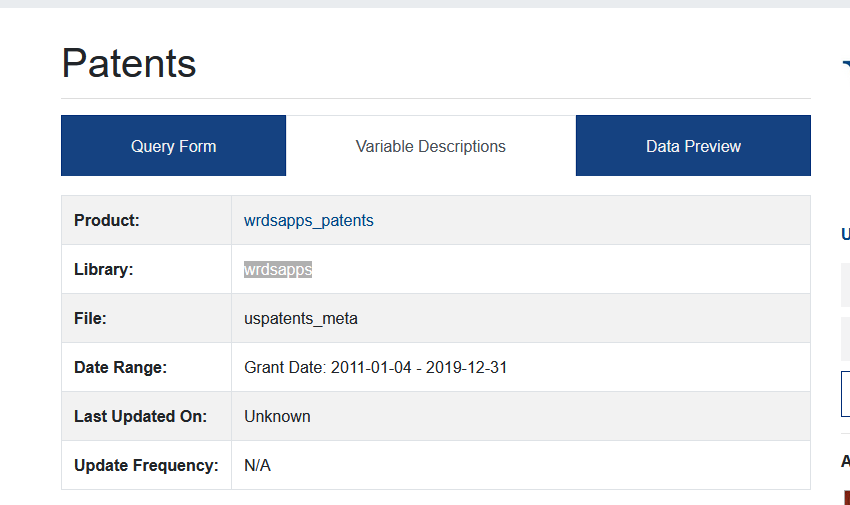

https://wrds-www.wharton.upenn.edu/pages/get-data/wrds-us-patents/patents/

In [20]:
conn.get_table(library='wrdsapps', table='uspatents_meta', obs=5)

,patnum,patnum_kpss,ptype,grantdate,appldate,applnum,ee_number,ee_name,ee_role,ee_role_desc,ee_ind_fname,ee_ind_lname,ee_country,ee_state,ee_city,backward_cites,forward_cites
0,07861318,7861318.0,utility,2011-01-04,2007-01-29,11699120,0.0,"Morning Pride Manufacturing, L.L.C.",02,United States company or corporation,None,None,US,OH,Dayton,11.0,1.0
1,07861319,7861319.0,utility,2011-01-04,2009-03-05,12398723,0.0,"AlignMed, LLC",02,United States company or corporation,None,None,US,AZ,Scottsdale,63.0,33.0
2,07861321,7861321.0,utility,2011-01-04,2008-03-19,12051201,0.0,"Warrior Sports, Inc.",02,United States company or corporation,None,None,US,MI,Warren,48.0,9.0
3,07861322,7861322.0,utility,2011-01-04,2006-12-12,11609665,0.0,"Yupoong, Inc.",03,Foreign company or corporation,None,None,KR,None,Seoul,14.0,2.0
4,07861323,7861323.0,utility,2011-01-04,2005-08-22,11990752,0.0,Toratani Kabushiki Kaisha,03,Foreign company or corporation,None,None,JP,None,Ishikawa,16.0,0.0


Patent linking table

https://wrds-www.wharton.upenn.edu/pages/get-data/wrds-us-patents/compustat-link/

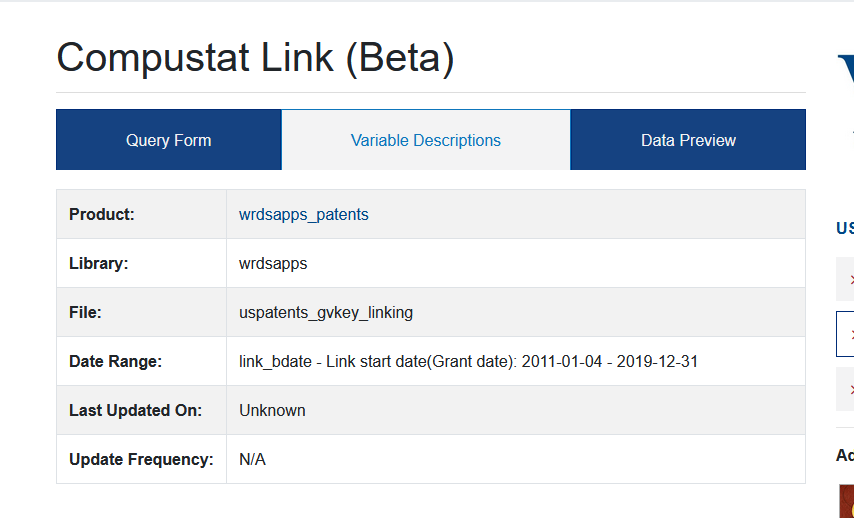

link_bdate - Link start date(Grant date)

This is the start date

We have the grant date here, and see the patent data above matches, but just check 100% that this is the case




Use the below to see the number of patents. So we can use the patent data, and boardex, and other company workflow.

Number of patents could be used as a impact factor later.


In [21]:
conn.get_table(library='wrdsapps', table='uspatents_gvkey_linking', obs=5)

,patnum,gvkey_numeric,link_bdate,initial_assign,subsidiary_flag,wrds_score,multi_names_flag,gvkey
0,07861318,160718.0,2011-01-04,Y,Y,4.0,0.0,160718
1,07861331,10535.0,2011-01-04,Y,None,3.0,0.0,010535
2,07861334,10115.0,2011-01-04,Y,None,3.0,0.0,010115
3,07861335,10115.0,2011-01-04,Y,None,3.0,0.0,010115
4,07861343,11465.0,2011-01-04,Y,None,2.0,0.0,011465


In [2]:
# get the data based on specific SIC code ids.

In [ ]:
# look at how to add educational background for the data here

# and maybe do topic modelling for that workflow here

### US Patents

https://wrds-www.wharton.upenn.edu/pages/get-data/wrds-us-patents/

Use this data

And also link the data to compustat, which can then link to boardex companies with boardex ids

**Compustat will be the central metric for linking all the data together**

Links with Computat will be done with `Gvkey` as seen with the initial data

In [3]:
# run the data given the instructions, and the initial data extracted from initial data analysis to match, and review approach afterwards.

Now that you have the patent data, just get the features needed - like number of patents - ask D.

Ask next week what are the relevant features.